In [ ]:
#With linear regression, we will try to predict car prices. 


#First, importing important libraries and loading our csv file.

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [286]:
cars = pd.read_csv('CarPrice_Assignment.csv')

In [287]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Exploratory Data Analysis // Gaining initial information about the dataset.

In [288]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#Our car prices have a density in 10.000 dollars.

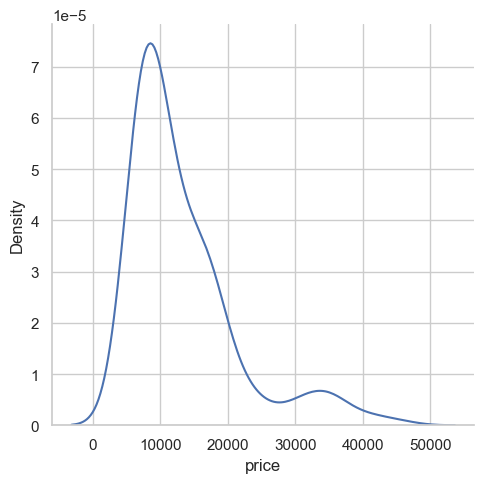

In [289]:
sns.set_style('whitegrid')
sns.displot(data=cars, x='price', kind='kde')

In [ ]:
#Our car prices are mostly correlated with the enginesize. 
#It is possible to observe high amounts of positive and negative correlations.

In [290]:
cars.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

<Figure size 1200x1000 with 0 Axes>

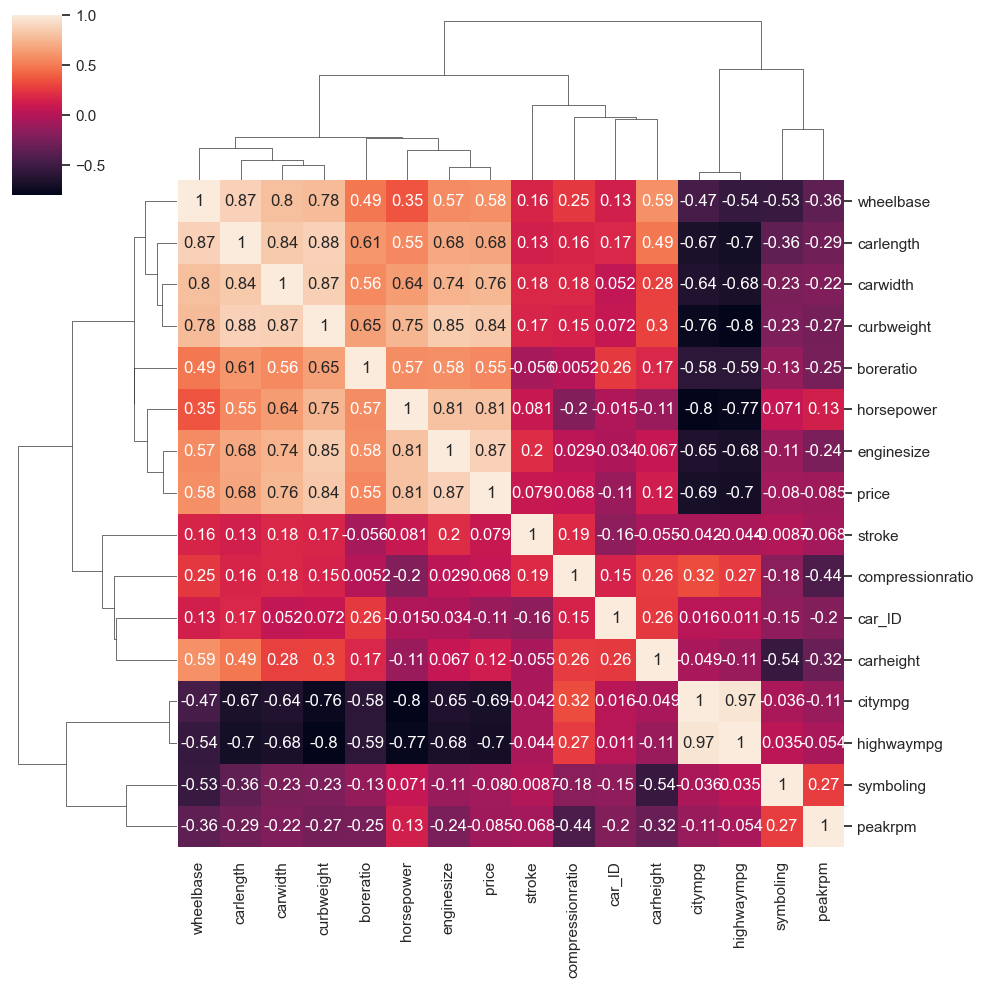

In [291]:
plt.figure(figsize=(12,10))
sns.clustermap(cars.corr(), annot=True)

In [ ]:
#Also correlations can be seen in the lmplot's below.

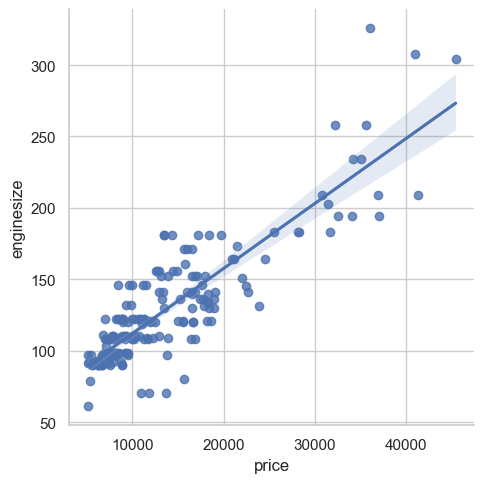

In [292]:
sns.lmplot(data=cars, x='price', y='enginesize')

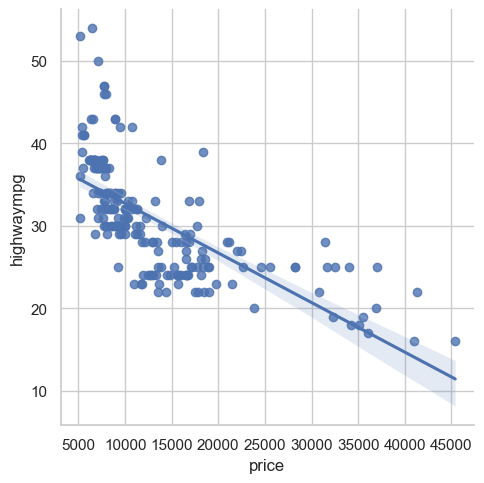

In [293]:
sns.lmplot(data=cars, x='price', y='highwaympg')

In [294]:
#Data Preprocessing 

#Checking the null values.
#Feature Engineering.
#Turning categorical values to integer values with .get_dummies().


In [295]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [296]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [297]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
#Creating new columns from object type columns,  which will help us to make more healty linear regression model.

In [298]:
cars['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [299]:
cars['fueltype'] = pd.get_dummies(cars['fueltype'], drop_first=True)

In [300]:
cars['aspiration'] = pd.get_dummies(cars['aspiration'], drop_first=True)

In [301]:
cars['doornumber'] = pd.get_dummies(cars['doornumber'], drop_first=True)

In [302]:
carbody = pd.get_dummies(cars['carbody'], drop_first=True)

In [303]:
drivewheel = pd.get_dummies(cars['drivewheel'], drop_first=True)

In [304]:
engineloc = pd.get_dummies(cars['enginelocation'], drop_first=True)

In [305]:
enginetype = pd.get_dummies(cars['enginetype'], drop_first=True)

In [306]:
cylindernumber = pd.get_dummies(cars['cylindernumber'], drop_first=True)

In [307]:
fuelsystem = pd.get_dummies(cars['fuelsystem'], drop_first=True)

In [308]:
new_df = pd.concat([cars, carbody, drivewheel, engineloc, enginetype, cylindernumber, fuelsystem], axis=1 )

In [309]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    uint8  
 4   aspiration        205 non-null    uint8  
 5   doornumber        205 non-null    uint8  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# We already turned our columns to a usable format. We are dropping the unnecessary object columns.

In [310]:
new_df = new_df.drop(['CarName', 'carbody', 'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], axis=1)


In [311]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    uint8  
 3   aspiration        205 non-null    uint8  
 4   doornumber        205 non-null    uint8  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginesize        205 non-null    int64  
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  citympg           205 non-null    int64  
 1

In [312]:
#Dividing our data into train and test test
#Scaling our data
#Creating and training our model

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X= new_df.drop('price', axis=1)
y= new_df['price']

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [316]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
scaler = MinMaxScaler()

In [318]:
X_train= scaler.fit_transform(X_train)

In [319]:
X_test = scaler.transform(X_test)

In [320]:
X_train

array([[0.44334975, 0.6       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16256158, 0.6       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22167488, 0.4       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39901478, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05418719, 0.4       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4679803 , 0.6       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [321]:
from sklearn.linear_model import LinearRegression

In [322]:
lm = LinearRegression()

In [323]:
lm.fit(X_train,y_train)

LinearRegression()

In [324]:
predictions = lm.predict( X_test)

In [ ]:
#Evaluation of our model
#When we look at our MAE(Mean Absolute Error), we can see that it is not that high. 

In [325]:
from sklearn import metrics

In [326]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1853.8942946135753
MSE: 7877010.083461902
RMSE: 2806.601162164283


In [ ]:
#To see the difference better, we can plot a kde plot for the point differences.
#We can see a normal distribution, which means healty predictions.

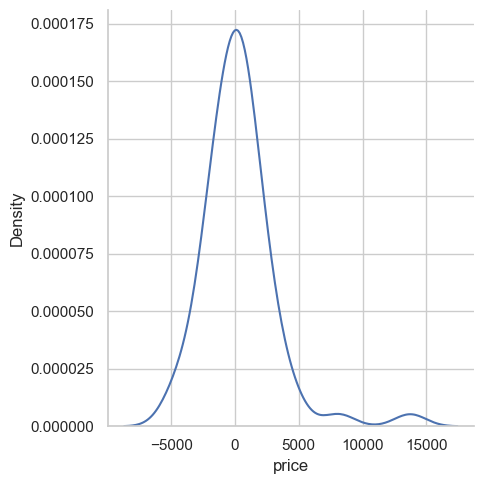

In [327]:
sns.displot((y_test-predictions), kind='kde')

In [ ]:
#We can try our model with some example data. 
#In order to fit it, and get the price, you need to enter all the attributes. We can also take a sample and test it.

In [348]:
new_car = new_df.drop('price',axis=1).iloc[150]

In [349]:
new_car

car_ID               151.00
symboling              1.00
fueltype               1.00
aspiration             0.00
doornumber             1.00
wheelbase             95.70
carlength            158.70
carwidth              63.60
carheight             54.50
curbweight          1985.00
enginesize            92.00
boreratio              3.05
stroke                 3.03
compressionratio       9.00
horsepower            62.00
peakrpm             4800.00
citympg               35.00
highwaympg            39.00
hardtop                0.00
hatchback              1.00
sedan                  0.00
wagon                  0.00
fwd                    1.00
rwd                    0.00
rear                   0.00
dohcv                  0.00
l                      0.00
ohc                    1.00
ohcf                   0.00
ohcv                   0.00
rotor                  0.00
five                   0.00
four                   1.00
six                    0.00
three                  0.00
twelve              

In [ ]:
#REMINDER -- Since we scaled our model, the new examples also need to be scaled.

In [356]:
X_train[0].shape

(44,)

In [358]:
new_car = scaler.transform(new_car.values.reshape(-1, 44))

In [ ]:
# As a result, our model predicted, 5382 dollar. 

In [351]:
lm.predict(new_car)

array([5382.88763061])

In [ ]:
# The real price was, 5348 dollar. The prediction is very successfull with only 34 dollars difference. 

In [357]:
new_df.iloc[150].price

5348.0